# Visualisation of CNN filters

This notebook provides visualisations for the conv2d filters used in the DQN.

## Load filters from NN

Filters on network can be accessed with `.{filter name}`

In [33]:
from rl_agents.agent import policy_net

first_filter = policy_net.conv1
first_filter

Conv2d(3, 2, kernel_size=(50, 50), stride=(49, 49))

## Visualisation function

We define a function to visualise a grid of the filters.

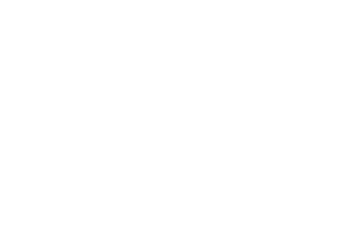

In [34]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt

plt.axis("off")
plt.ioff()

# from https://stackoverflow.com/questions/55594969/how-to-visualise-filters-in-a-cnn-with-pytorch

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

## Display visualisation

The visualisation function is invoked given the weights of the filter.

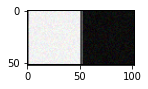

In [35]:
first_filter_weights = first_filter.weight.data.clone()
visTensor(first_filter_weights, ch=3, allkernels=False)

## Load saved models

Loads a previously pickled model to test what the filters show then.

In [36]:
import torch
from rl_agents.agent import DQN, n_actions

def visualise_saved(saved_fp):
    policy_net = DQN(50, 100, n_actions).to("cpu")
    policy_net.load_state_dict(torch.load(saved_fp))
    policy_net.eval()
    conv2d_weights = policy_net.conv1.weight.data.clone()
    visTensor(conv2d_weights, ch=3, allkernels=False)

### Standard trained

Agent trained with 1 episode.

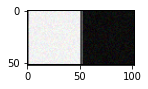

In [37]:
visualise_saved("resources/dqn_normal")

### Red mana overlay

Testing while using a red mana overlay instead of grayscale. Interestingly the left overlay filter (unchanged) is showing as blue now. Agent trained with 1 episode.

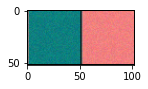

In [38]:
visualise_saved("resources/dqn_red_mana")

The same but after 5 episodes of training. Colours have switched?

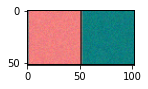

In [39]:
visualise_saved("resources/dqn_red_mana_5")

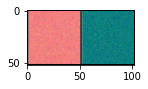

In [40]:
visualise_saved("resources/dqn_red_9_time_reward")